In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path
import string
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
cwd = Path.cwd()
train_directory = str(cwd) + r'\OneDrive\Desktop\Datasets\asl\asl_alphabet_train'
validation_directory = str(cwd) + r'\OneDrive\Desktop\Datasets\asl\asl_alphabet_val'

alphabet = list(string.ascii_uppercase)
alphabet.append('space')

directories = {}

for char in alphabet:
    path = os.path.join(train_directory,char)
    directories.setdefault(char,path)

### The dataset includes 27 sign language characters (26 letters and space) with 3,000 images of each letter, totalling 81,000 images. Here are examples of what characters look like:

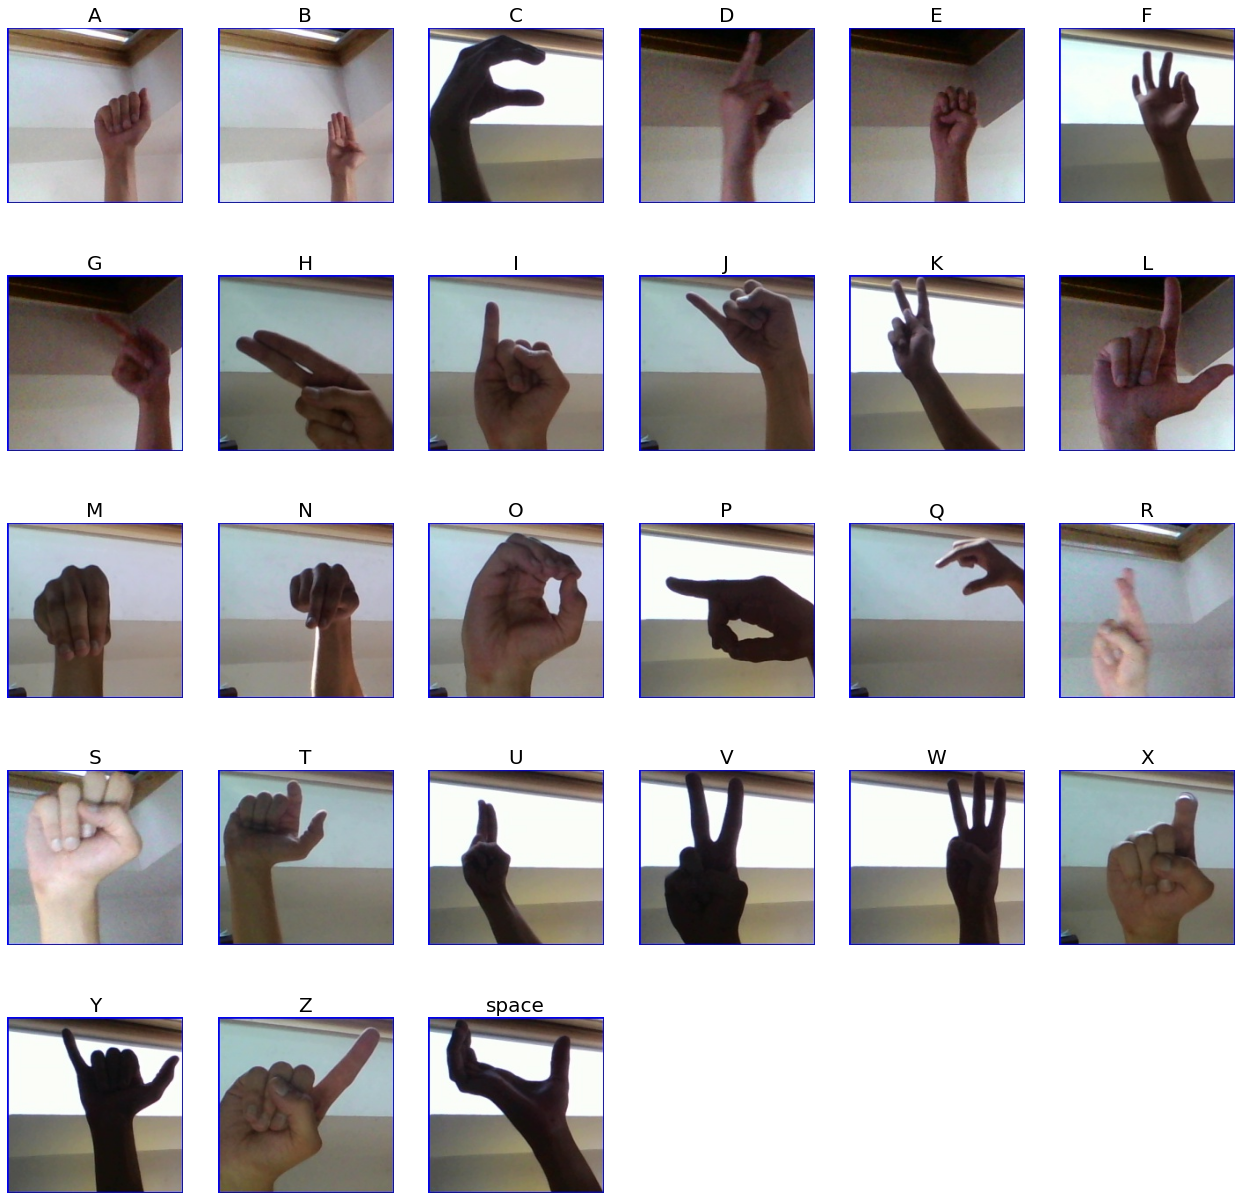

In [3]:
fig = plt.figure(figsize = (22,22))

for char in range(len(alphabet)):
    
    num = 12
    while num%12 == 0:
        num = random.randint(0,3000)
    
    letter = alphabet[char]
    img_path = train_directory + f'\\{letter}\\{letter}{num}.jpg'
    img = mpimg.imread(img_path)
    
    fig.add_subplot(5,6,char+1)
    plt.imshow(img)
    plt.title(letter,fontdict = {'fontsize':20})
    plt.axis('off')
    
plt.show()

In [4]:
train_data_generator = ImageDataGenerator(rescale=1/255,
                                          rotation_range=20,
                                          horizontal_flip=False,
                                          width_shift_range=.15,
                                          height_shift_range=.15,
                                          shear_range=.2)                                          

batch_size = 32
img_height = 150
img_width = 150
depth = 3

print('Training Data:')
train_data = train_data_generator.flow_from_directory(train_directory,
                                               target_size=(img_height,
                                                              img_width),
                                               class_mode='categorical',
                                               batch_size=batch_size)
                                               
validation_data_generator = ImageDataGenerator(rescale=1/255)

print('\nValidation Data:')
validation_data = validation_data_generator.flow_from_directory(validation_directory,
                                                              target_size=(img_height,
                                                                           img_width),
                                                              class_mode='categorical',
                                                              batch_size=batch_size)

Training Data:
Found 75357 images belonging to 27 classes.

Validation Data:
Found 5670 images belonging to 27 classes.


In [5]:
filepath = r'OneDrive\Desktop\Datasets\best_weights'

save_best_weights = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                   monitor='val_accuracy',
                                                   save_best_only=True,
                                                   save_freq='epoch')
input_shape = (img_height,img_width,depth)

model = keras.Sequential([
    keras.layers.Conv2D(12,
                        (3,3),
                        activation='elu',
                        input_shape=input_shape),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(24,
                        (3,3),
                        activation='elu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(.1),
    keras.layers.Conv2D(64,
                        (3,3),
                        activation = 'elu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,
                        (3,3),
                        activation = 'elu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,
                        (3,3),
                        activation = 'elu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(520,
                       activation='elu'),
    keras.layers.Dense(80,
                       activation='elu'),
    keras.layers.Dense(27, activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 12)      336       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 24)        2616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        13888     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [6]:
epochs = 16

history = model.fit(train_data,
                   validation_data = validation_data,
                   epochs = epochs,
                   callbacks=[save_best_weights])

Epoch 1/16
2355/2355 [==============================] - 1264s 537ms/step - loss: 1.4046 - accuracy: 0.5566 - val_loss: 0.3845 - val_accuracy: 0.8730
INFO:tensorflow:Assets written to: OneDrive\Desktop\Datasets\best_weights\assets
Epoch 2/16
2355/2355 [==============================] - 1217s 517ms/step - loss: 0.5589 - accuracy: 0.8114 - val_loss: 0.2265 - val_accuracy: 0.9220
INFO:tensorflow:Assets written to: OneDrive\Desktop\Datasets\best_weights\assets
Epoch 3/16
2355/2355 [==============================] - 1298s 551ms/step - loss: 0.4159 - accuracy: 0.8603 - val_loss: 0.1972 - val_accuracy: 0.9321
INFO:tensorflow:Assets written to: OneDrive\Desktop\Datasets\best_weights\assets
Epoch 4/16
2355/2355 [==============================] - 1122s 476ms/step - loss: 0.3425 - accuracy: 0.8853 - val_loss: 0.1417 - val_accuracy: 0.9483
INFO:tensorflow:Assets written to: OneDrive\Desktop\Datasets\best_weights\assets
Epoch 5/16
2355/2355 [==============================] - 912s 387ms/step - loss: 

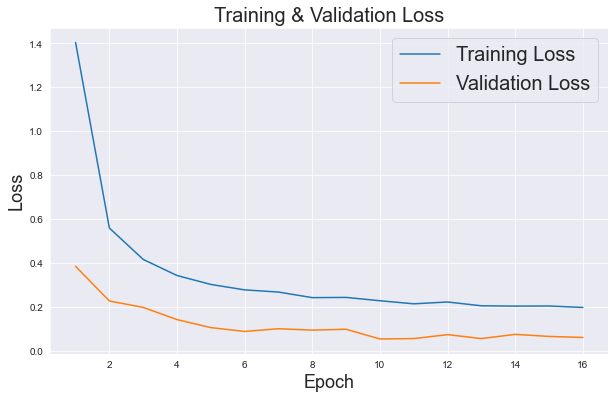

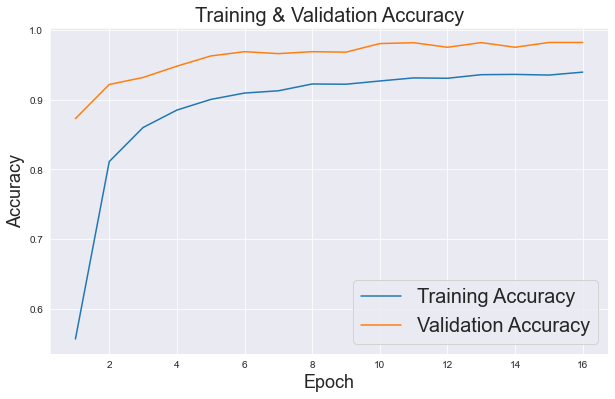

In [7]:
loss = history.history['loss']
accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

epoch = np.arange(1,len(loss)+1)

sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
plt.plot(epoch,loss)
plt.plot(epoch,validation_loss)
plt.title('Training & Validation Loss',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Loss',fontdict={'fontsize':18})
plt.legend(['Training Loss','Validation Loss'],prop={'size':20})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epoch,accuracy)
plt.plot(epoch,validation_accuracy)
plt.title('Training & Validation Accuracy',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Accuracy',fontdict={'fontsize':18})
plt.legend(['Training Accuracy','Validation Accuracy'],prop={'size':20})
sns.set_style('darkgrid')
plt.show()

In [8]:
loaded_model = keras.models.load_model(filepath)

def predict_letter(image):
    
    reshaped_image = image.reshape((1,) + image.shape)
    class_probabilities = loaded_model.predict(reshaped_image)
    letter = alphabet[class_probabilities.argmax()]
    
    return letter

validation_images = []
validation_labels = []
predicted_labels = []

for tup in validation_data:  
    pics = len(tup[0])       
    for pic in range(pics):
        img = tup[0][pic]
        actual_label = alphabet[tup[1][pic].argmax()]
        predicted_label = predict_letter(img)
        
        validation_images.append(img)
        validation_labels.append(actual_label)
        predicted_labels.append(predicted_label) 
        
    if len(validation_images) >= 2700:
        break

In [9]:
predicted_letters = {}

for i in range(len(validation_images)):
    
    letter = predicted_labels[i]
    
    if letter not in predicted_letters.keys():
        predicted_letters.setdefault(letter,[[validation_images[i]],[validation_labels[i]]])
        
    elif letter in predicted_letters.keys():
        predicted_letters[letter][0].append(validation_images[i])
        predicted_letters[letter][1].append(validation_labels[i])

## Here, I use images from the validation set to write a sentence based on the model's predictions. The large letters above the images are the actual labels, with the predicted labels underneath.

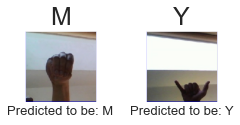

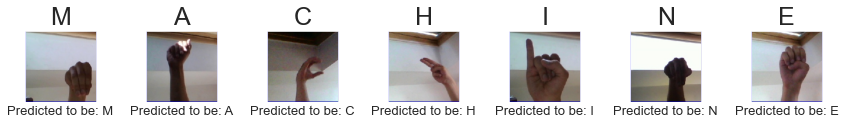

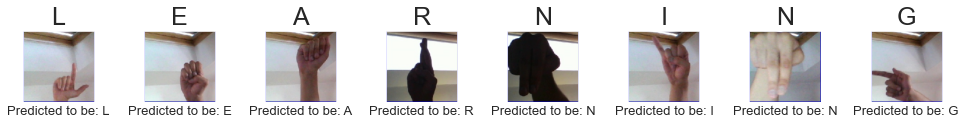

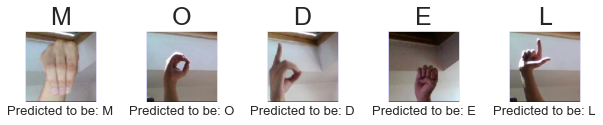

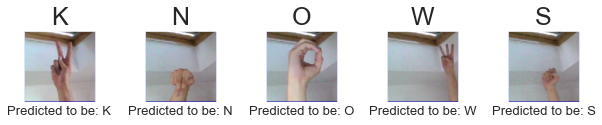

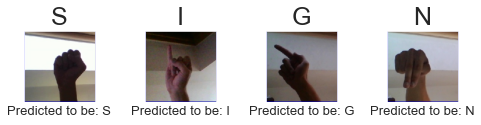

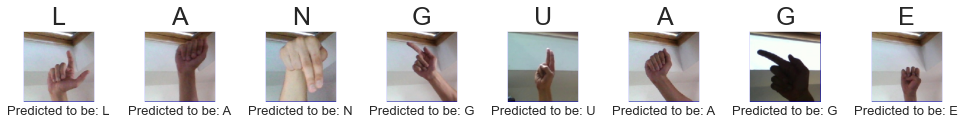

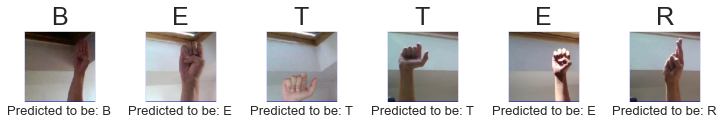

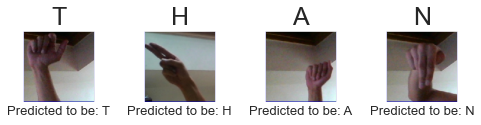

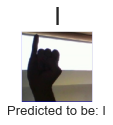

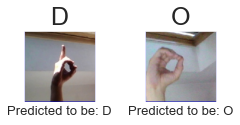

In [12]:
sentence = "My machine learning model knows sign language better than I do"

words = sentence.split()
longest_word_size = max([len(word) for word in words])

for word in words:
    fig = plt.figure(figsize=(17,17))
    word_length = len(word)
    for char in range(word_length):
        letter = word[char].upper()
        rand_num = random.randint(0,len(predicted_letters[letter][0])-1)
        img = predicted_letters[letter][0][rand_num]
        true_label = predicted_letters[letter][1][rand_num]
        
        fig.add_subplot(len(words),longest_word_size,char+1)
        plt.imshow(img)
        plt.title(true_label,fontdict={'fontsize':25})
        plt.xlabel('Predicted to be: '+str(letter),fontdict={'fontsize':13})
        plt.xticks(())
        plt.yticks(())
    plt.show()